## from https://web.stanford.edu/~boyd/papers/admm/

# Code

In [1]:
code = grabcode("https://web.stanford.edu/~boyd/papers/admm/total_variation/total_variation.html")


code =

    'function [x, history] = total_variation(b, lambda, rho, alpha)
     % total_variation  Solve total variation minimization via ADMM
     %
     % [x, history] = total_variation(b, lambda, rho, alpha)
     % 
     % Solves the following problem via ADMM:
     % 
     %   minimize  (1/2)||x - b||_2^2 + lambda * sum_i |x_{i+1} - x_i|
     %
     % where b in R^n.
     %
     % The solution is returned in the vector x.
     %
     % history is a structure that contains the objective value, the primal and 
     % dual residual norms, and the tolerances for the primal and dual residual 
     % norms at each iteration.
     % 
     % rho is the augmented Lagrangian parameter. 
     %
     % alpha is the over-relaxation parameter (typical values for alpha are 
     % between 1.0 and 1.8).
     %
     %
     % More information can be found in the paper linked at:
     % http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
     %
     
     t_start = tic;
     
   

In [2]:
%%file total_variation.m

function [x, history] = total_variation(b, lambda, rho, alpha)
% total_variation  Solve total variation minimization via ADMM
%
% [x, history] = total_variation(b, lambda, rho, alpha)
%
% Solves the following problem via ADMM:
%
%   minimize  (1/2)||x - b||_2^2 + lambda * sum_i |x_{i+1} - x_i|
%
% where b in R^n.
%
% The solution is returned in the vector x.
%
% history is a structure that contains the objective value, the primal and
% dual residual norms, and the tolerances for the primal and dual residual
% norms at each iteration.
%
% rho is the augmented Lagrangian parameter.
%
% alpha is the over-relaxation parameter (typical values for alpha are
% between 1.0 and 1.8).
%
%
% More information can be found in the paper linked at:
% http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
%

t_start = tic;

%% Global constants and defaults

QUIET    = 0;
MAX_ITER = 1000;
ABSTOL   = 1e-4;
RELTOL   = 1e-2;

%% Data preprocessing

n = length(b);

% difference matrix
e = ones(n,1);
D = spdiags([e -e], 0:1, n,n);

%% ADMM solver

x = zeros(n,1);
z = zeros(n,1);
u = zeros(n,1);

if ~QUIET
    fprintf('%3s\t%10s\t%10s\t%10s\t%10s\t%10s\n', 'iter', ...
      'r norm', 'eps pri', 's norm', 'eps dual', 'objective');
end

I = speye(n);
DtD = D'*D;

for k = 1:MAX_ITER

    % x-update
    x = (I + rho*DtD) \ (b + rho*D'*(z-u));

    % z-update with relaxation
    zold = z;
    Ax_hat = alpha*D*x +(1-alpha)*zold;
    z = shrinkage(Ax_hat + u, lambda/rho);

    % y-update
    u = u + Ax_hat - z;


    % diagnostics, reporting, termination checks
    history.objval(k)  = objective(b, lambda, D, x, z);

    history.r_norm(k)  = norm(D*x - z);
    history.s_norm(k)  = norm(-rho*D'*(z - zold));

    history.eps_pri(k) = sqrt(n)*ABSTOL + RELTOL*max(norm(D*x), norm(-z));
    history.eps_dual(k)= sqrt(n)*ABSTOL + RELTOL*norm(rho*D'*u);

    if ~QUIET
        fprintf('%3d\t%10.4f\t%10.4f\t%10.4f\t%10.4f\t%10.2f\n', k, ...
            history.r_norm(k), history.eps_pri(k), ...
            history.s_norm(k), history.eps_dual(k), history.objval(k));
    end

    if (history.r_norm(k) < history.eps_pri(k) && ...
       history.s_norm(k) < history.eps_dual(k))
         break;
    end
end

if ~QUIET
    toc(t_start);
end
end

function obj = objective(b, lambda, D, x, z)
    obj = .5*norm(x - b)^2 + lambda*norm(z,1);
end

function y = shrinkage(a, kappa)
    y = max(0, a-kappa) - max(0, -a-kappa);
end

Created file '/home/wenh06/Jupyter/wenhao/workspace/fl_seminar/code/boyd-admm/total_variation.m'.


# Example

In [3]:
eg_code = grabcode("https://web.stanford.edu/~boyd/papers/admm/total_variation/total_variation_example.html")


eg_code =

    '% Total variation denoising with random data
     
     %% Generate problem data
     rand('seed', 0);
     randn('seed', 0);
     
     n = 100;
     
     x0 = ones(n,1);
     for j = 1:3
         idx = randsample(n,1);
         k = randsample(1:10,1);
         x0(ceil(idx/2):idx) = k*x0(ceil(idx/2):idx);
     end
     b = x0 + randn(n,1);
     
     lambda = 5;
     
     e = ones(n,1);
     D = spdiags([e -e], 0:1, n,n);
     
     %% Solve problem
     
     [x history] = total_variation(b, lambda, 1.0, 1.0);
     
     %% Reporting
     K = length(history.objval);                                                                                                        
     
     h = figure;
     plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2); 
     ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');
     
     g = figure;
     subplot(2,1,1);                                                                                                                

### Generate problem data

In [4]:
rand('seed', 0);
randn('seed', 0);

n = 100;

x0 = ones(n,1);
for j = 1:3
    idx = randsample(n,1);
    k = randsample(1:10,1);
    x0(ceil(idx/2):idx) = k*x0(ceil(idx/2):idx);
end
b = x0 + randn(n,1);

lambda = 5;

e = ones(n,1);
D = spdiags([e -e], 0:1, n,n);

### Solve problem

In [5]:
[x history] = total_variation(b, lambda, 1.0, 1.0);

iter	    r norm	   eps pri	    s norm	  eps dual	 objective
  1	    7.1216	    0.0722	    0.0000	    0.0793	     30.67
  2	    4.6035	    0.0470	    0.0000	    0.1067	     55.88
  3	    3.7430	    0.0389	    0.2524	    0.1187	     70.97
  4	    3.1490	    0.0352	    1.5080	    0.1216	     86.77
  5	    2.6064	    0.0365	    1.7122	    0.1226	     98.74
  6	    2.1441	    0.0416	    1.7540	    0.1219	    110.68
  7	    1.7400	    0.0481	    1.4449	    0.1204	    120.07
  8	    1.4723	    0.0539	    1.0310	    0.1190	    126.85
  9	    1.2828	    0.0580	    0.6746	    0.1180	    130.75
 10	    1.0672	    0.0608	    0.5517	    0.1171	    134.95
 11	    0.8766	    0.0627	    0.4416	    0.1166	    138.06
 12	    0.7446	    0.0641	    0.2934	    0.1163	    140.18
 13	    0.6625	    0.0652	    0.1945	    0.1162	    141.69
 14	    0.6064	    0.0661	    0.1368	    0.1161	    142.79
 15	    0.5644	    0.0668	    0.1054	    0.1160	    143.65
 16	    0.5295	    0.0674	    0.0874	    0.1159	    144

### Reporting

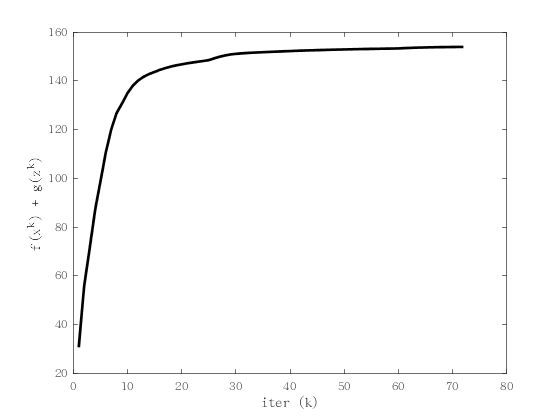

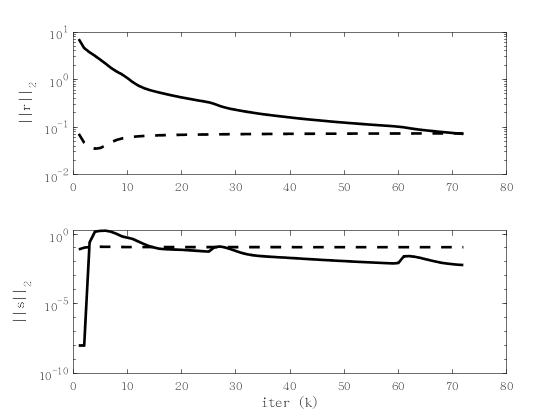

In [7]:
K = length(history.objval);

h = figure;
plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2);
ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');

g = figure;
subplot(2,1,1);
semilogy(1:K, max(1e-8, history.r_norm), 'k', ...
    1:K, history.eps_pri, 'k--',  'LineWidth', 2);
ylabel('||r||_2');

subplot(2,1,2);
semilogy(1:K, max(1e-8, history.s_norm), 'k', ...
    1:K, history.eps_dual, 'k--', 'LineWidth', 2);
ylabel('||s||_2'); xlabel('iter (k)');